# Train a MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
print(mnist.DESCR) # description of dataset

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# Preparing the dataset

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']
X.shape # imares are 28 x 28

(70000, 784)

In [5]:
y.shape
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kneigh_class = KNeighborsClassifier(n_neighbors=7, weights='distance')


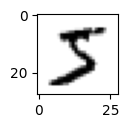

In [22]:

%matplotlib inline
import matplotlib as mpl

images = mnist.data.to_numpy()
plt.subplot(431)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r)


# Train

In [23]:
kneigh_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [24]:
print(kneigh_class.predict(X_train[:10]))

[5 0 4 1 9 2 1 3 1 4]


In [25]:
y_train_2 = (y_train == 2) # take labels that are 2

In [26]:
kneigh_class.fit(X_train, y_train)
result_x_test = kneigh_class.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score,classification_report, recall_score
print("accuracy", accuracy_score(y_test, result_x_test))
print(classification_report(y_test, result_x_test))


accuracy 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

cross_val_score(kneigh_class, X_train, y_train)

array([0.96916667, 0.97041667, 0.96725   , 0.96875   , 0.96941667])

In [29]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train.astype(np.float64)) # Convert to float
cross_val_score(kneigh_class, X_train_scaled, y_train, scoring="accuracy")

array([0.94033333, 0.94341667, 0.94341667, 0.93766667, 0.94691667])

# Analyze

In [30]:
y_train_pred = cross_val_predict(kneigh_class, X_train_scaled, y_train)
conf_m = confusion_matrix(y_train, y_train_pred)


In [31]:
conf_m

array([[5826,    4,   16,    4,    0,   20,   41,    4,    3,    5],
       [   1, 6669,   20,    8,    8,    2,   16,   11,    3,    4],
       [  63,   62, 5506,   99,   29,    9,   59,   64,   47,   20],
       [  12,   26,   55, 5769,    6,   84,    7,   71,   61,   40],
       [   3,   71,   52,    7, 5407,   18,   22,   32,    8,  222],
       [  26,   13,   11,  155,   12, 4989,  104,   13,   40,   58],
       [  52,   13,   17,    5,   11,   48, 5764,    1,    7,    0],
       [  11,   62,   20,   15,   63,    2,    0, 5872,    5,  215],
       [  41,   93,   41,  115,   39,  193,   30,   18, 5212,   69],
       [  19,   12,   19,   49,   99,   12,    1,  192,   19, 5527]],
      dtype=int64)

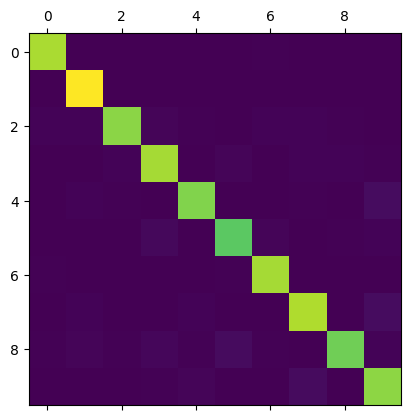

In [32]:
# plot confusion matrix
plt.matshow(conf_m)
plt.show()

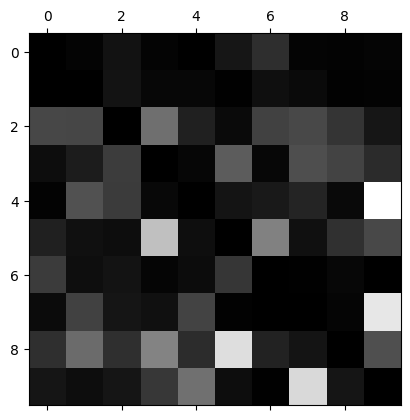

In [33]:
# plot only errors
row_sums = conf_m.sum(axis=1, keepdims=True)
norm_conf_mx = conf_m / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Hyper parameter tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [{'weights' : ["uniform", "distance"],
               "n_neighbors": [6,7,8]}
               ]
knn_clf = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn_clf, param_grid, verbose =3, cv = 5)
random_search.fit(X_train, y_train)

c:\Users\rain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=6, weights=uniform;, score=0.968 total time=  16.3s
[CV 2/5] END ....n_neighbors=6, weights=uniform;, score=0.969 total time=  15.9s
[CV 3/5] END ....n_neighbors=6, weights=uniform;, score=0.968 total time=  16.1s
[CV 4/5] END ....n_neighbors=6, weights=uniform;, score=0.967 total time=  16.0s
[CV 5/5] END ....n_neighbors=6, weights=uniform;, score=0.969 total time=  16.5s
[CV 1/5] END ...n_neighbors=6, weights=distance;, score=0.972 total time=  16.2s
[CV 2/5] END ...n_neighbors=6, weights=distance;, score=0.972 total time=  16.9s
[CV 3/5] END ...n_neighbors=6, weights=distance;, score=0.970 total time=  16.0s
[CV 4/5] END ...n_neighbors=6, weights=distance;, score=0.970 total time=  16.1s
[CV 5/5] END ...n_neighbors=6, weights=distance;, score=0.972 total time=  15.8s
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.968 total time=  15.7s
[CV 2/5] END ....n_neighbors=7, weights=uniform;,

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [6, 7, 8],
                                         'weights': ['uniform', 'distance']}],
                   verbose=3)

In [35]:
print("best params", random_search.best_params_)
print("best score", random_search.best_score_)

best params {'weights': 'distance', 'n_neighbors': 6}
best score 0.9712333333333334


In [36]:
y_pred = random_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9709

In [38]:
accuracy_score(y_test, result_x_test)

0.97